# Customer Segmentation with K-Nearest Neighbors (KNN)

You work for a retail company, and your taskis to segment customers based on their purchase behavior using the K-Nearest Neighbors (KNN) algorithm. The dataset contains information about customers, such as purchase history, age, and income. Your goal is to create customer segments for targeted marketing. Answer the following questions based on this case study.

1. Data Exploration:

a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe the features, target variable, and data distribution.

b. Explain the importance of customer segmentation in the retail industry.

2. Data Preprocessing:

a. Prepare the customer data for analysis. Discuss the steps involved in data preprocessing, such as scaling, handling missing values, and encoding categorical variables.

3. Implementing KNN:

a. Implement the K-Nearest Neighbors algorithm using Python libraries like scikit-learn to segment customers based on their features.
b. Choose an appropriate number of neighbors (K) for the algorithm and explain your choice.

4. Model Training:

a. Train the KNN model using the preprocessed customer dataset.

b. Discuss the distance metric used for finding the nearest neighbors and its significance in customer segmentation.

5. Customer Segmentation:

a. Segment the customers based on their purchase behavior, age, and income.

b. Visualize the customer segments to gain insights into the distribution and characteristics of each segment.
6. Hyperparameter Tuning:

a. Explain the role of the hyperparameter (K) in the KNN algorithm and suggest strategies for selecting the optimal value of K.

b. Conduct hyperparameter tuning for the KNN model and discuss the impact of different values of K on segmentation results.

7. Model Evaluation:

a. Evaluate the KNN model's performance in customer segmentation. Discuss the criteria and metrics used for evaluating unsupervised learning models.

b. Interpret the results and provide insights on how the customer segments can be leveraged for marketing strategies.

8. Real-World Application:

a. Describe the practical applications of customer segmentation in the retail industry.

b. Discuss how customer segmentation can lead to improved customer engagement and increased sales.

9. Model Limitations:

a. Identify potential limitations of the KNN algorithm in customer segmentation and discuss scenarios in which it may not perform well.

10. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the retail company. Highlight the significance of customer segmentation and the role of KNN in data-driven marketing.
In this case study, you are required to demonstrate your ability to use the KNN algorithm for customer segmentation, understand the importance of hyperparameter tuning, and communicate the practical applications of customer segmentation in the retail sector.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
#Load the dataset
data=pd.read_csv("customer.csv")
data.head()

,Customer ID,Name,Age,Income,Purchase History
0,1,John Doe,30,50000,5
1,2,Jane Smith,25,60000,3
2,3,Michael Johnson,40,75000,8
3,4,Susan Brown,35,55000,4
4,5,David Lee,28,60000,6


In [3]:
data.shape

(100, 5)

In [4]:
data.describe()

,Customer ID,Age,Income,Purchase History
count,100.000000,100.000000,100.000000,100.00000
mean,50.500000,33.350000,66610.000000,5.97000
std,29.011492,6.074246,11639.270865,2.21772
min,1.000000,22.000000,48000.000000,2.00000
25%,25.750000,28.750000,55750.000000,4.00000
50%,50.500000,32.000000,65500.000000,6.00000
75%,75.250000,38.000000,76000.000000,8.00000
max,100.000000,49.000000,90000.000000,10.00000


In [5]:
data.isna().sum()

Customer ID         0
Name                0
Age                 0
Income              0
Purchase History    0
dtype: int64

array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Purchase History'}>]], dtype=object)

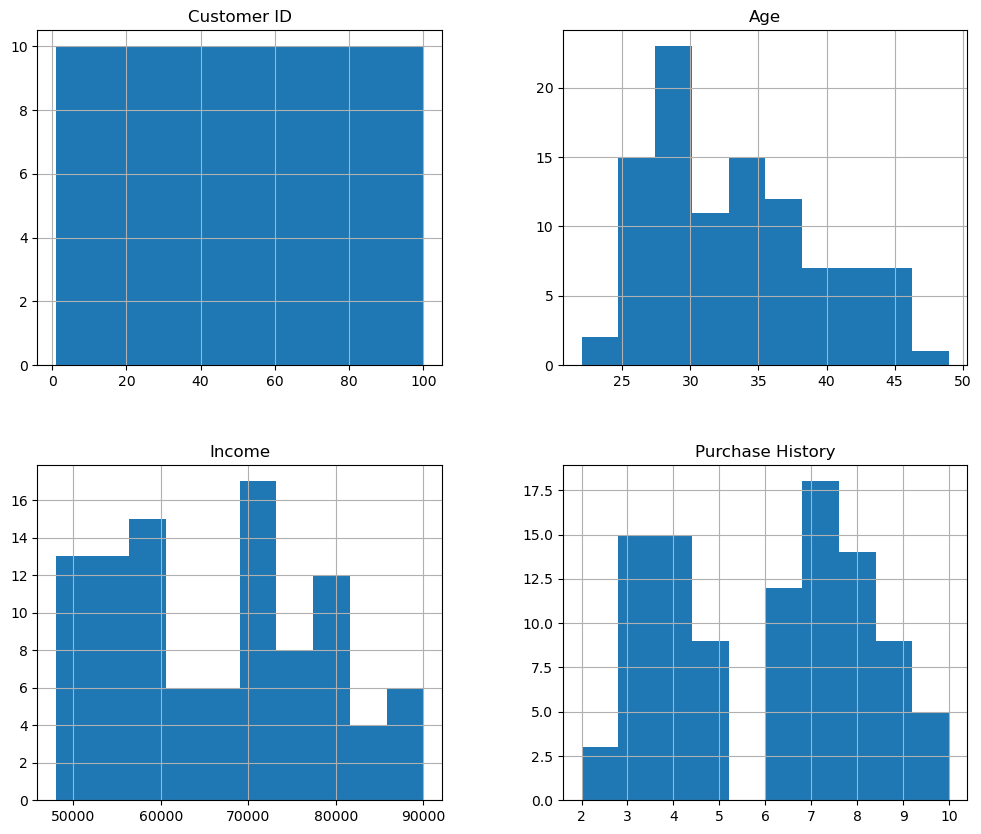

In [6]:
data.hist(figsize=(12,10))

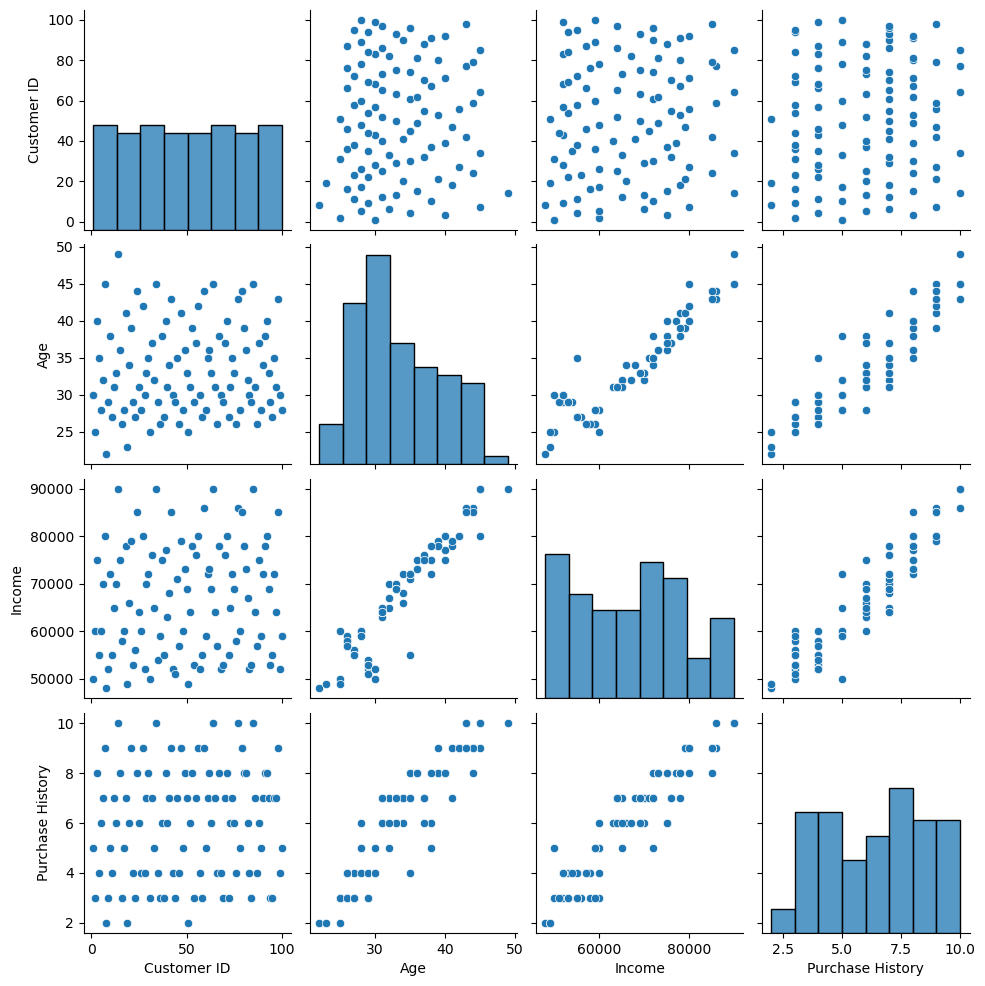

In [7]:
sns.pairplot(data)

In [7]:
x=data.iloc[:,2:4]
x.head()

,Age,Income
0,30,50000
1,25,60000
2,40,75000
3,35,55000
4,28,60000


In [8]:
y=data.iloc[:,-1:]
y.head()

,Purchase History
0,5
1,3
2,8
3,4
4,6


In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
print("********Training Data Shape**********")
print('Training data-x-Shape:',xtrain.shape)
print('Training data-y-Shape:',ytrain.shape)
print("********Testing Data Shape**********")
print('Testing data(X-Input) Shape:',xtest.shape)
print('Testing data(y-Outcome) Shape:',ytest.shape)

********Training Data Shape**********
Training data-x-Shape: (80, 2)
Training data-y-Shape: (80, 1)
********Testing Data Shape**********
Testing data(X-Input) Shape: (20, 2)
Testing data(y-Outcome) Shape: (20, 1)


In [10]:
knn_model=KNeighborsClassifier(n_neighbors=3)
print('**********KNN Classifier Model**********')
print("Training Phase\n")
knn_model.fit(xtrain,ytrain)
print("Training is completed")
print("="*100)
print("Testing Phase\n")
ypred=knn_model.predict(xtest)
print("Predicted Class Label are:",ypred)
print('Test is also done')
print("="*100)

**********KNN Classifier Model**********
Training Phase

Training is completed
Testing Phase

Predicted Class Label are: [ 3  2  4  7  5  9  6  4  6 10  5  6  9  6  2  3  3  7  8  8]
Test is also done


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Scaling the data

In [11]:
#feature scaling
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.fit_transform(xtest)
#print(xtrain)
#print(xtest)

In [12]:
xtrain.shape

(80, 2)

In [13]:
xtrain[0]

array([-1.18791908, -0.68638518])

In [14]:
#subtract 1 from the rootvalue to get odd number to perform better
import math
math.sqrt(len(ytest))

4.47213595499958

# KNN with k=3

In [15]:
classifier=KNeighborsClassifier(n_neighbors=3,p=2,metric='euclidean')
classifier.fit(xtrain,ytrain)

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [16]:
ypred=classifier.predict(xtest)
ypred

array([ 3,  2,  3,  7,  5,  9,  5,  3,  6, 10,  5,  6,  9,  8,  3,  3,  4,
        7,  7,  8], dtype=int64)

In [17]:
#Evaluate model
cm=confusion_matrix(ytest,ypred)
cm

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 2, 2, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
accuracy = accuracy_score(ytest,ypred)

# Calculate precision for each class and get the average
precision = precision_score(ytest,ypred,average='macro')

# Calculate recall for each class and get the average
recall = recall_score(ytest,ypred, average='macro')

# Calculate F1-Score for each class and get the average
f1 = f1_score(ytest,ypred,average='macro')



# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.35
Precision: 0.4296296296296296
Recall: 0.25
F1 Score: 0.27989417989417986


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN with k=5

In [21]:
classifier=KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')
classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)
ypred
cm=confusion_matrix(ytest,ypred)
cm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
accuracy = accuracy_score(ytest,ypred)

# Calculate precision for each class and get the average
precision = precision_score(ytest,ypred,average='macro')

# Calculate recall for each class and get the average
recall = recall_score(ytest,ypred, average='macro')

# Calculate F1-Score for each class and get the average
f1 = f1_score(ytest,ypred,average='macro')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.3
Precision: 0.4625
Recall: 0.26041666666666663
F1 Score: 0.29642857142857143


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN with k=7

In [22]:
classifier=KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean')
classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)
ypred
cm=confusion_matrix(ytest,ypred)
cm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
accuracy = accuracy_score(ytest,ypred)

# Calculate precision for each class and get the average
precision = precision_score(ytest,ypred,average='macro')

# Calculate recall for each class and get the average
recall = recall_score(ytest,ypred, average='macro')

# Calculate F1-Score for each class and get the average
f1 = f1_score(ytest,ypred,average='macro')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.25
Precision: 0.35555555555555557
Recall: 0.17592592592592593
F1 Score: 0.19682539682539688


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN with k=9

In [23]:
classifier=KNeighborsClassifier(n_neighbors=9,p=2,metric='euclidean')
classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)
ypred
cm=confusion_matrix(ytest,ypred)
cm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
accuracy = accuracy_score(ytest,ypred)

# Calculate precision for each class and get the average
precision = precision_score(ytest,ypred,average='macro')

# Calculate recall for each class and get the average
recall = recall_score(ytest,ypred, average='macro')

# Calculate F1-Score for each class and get the average
f1 = f1_score(ytest,ypred,average='macro')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.4
Precision: 0.40740740740740744
Recall: 0.34259259259259256
F1 Score: 0.31587301587301586


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN with k=11

In [24]:
classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)
ypred
cm=confusion_matrix(ytest,ypred)
cm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
accuracy = accuracy_score(ytest,ypred)

# Calculate precision for each class and get the average
precision = precision_score(ytest,ypred,average='macro')

# Calculate recall for each class and get the average
recall = recall_score(ytest,ypred, average='macro')

# Calculate F1-Score for each class and get the average
f1 = f1_score(ytest,ypred,average='macro')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.4
Precision: 0.4583333333333333
Recall: 0.40625
F1 Score: 0.3375


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyper parameter tuning(performed on scaling data)(to find best k value)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
#Specify the range of k values within which we wish to search.
param_grid = {'n_neighbors': range(1, 21)}

In [28]:
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(xtrain,ytrain)

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

In [29]:
best_k=grid_search.best_params_['n_neighbors']
best_k

1

# Build KNN model with best K value

In [31]:
#Train the model
best_knn_model=KNeighborsClassifier(n_neighbors=best_k)
print('********************Best KNN Classifier Model**********************')
print("Training Started.......\n")
print()
best_knn_model.fit(xtrain,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred=best_knn_model.predict(xtest)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')

********************Best KNN Classifier Model**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [ 3  2  4  7  4  9  6  4  7 10  4  7  9  8  3  3  6  7  7  8]

Testing is also completed....



C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))

Accuracy Score:	 0.4

Confusion Matrix:
 [[0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0]
 [0 1 2 0 1 0 0 0 0]
 [0 1 2 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 1 2 2 1 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1]]

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.33      0.50      0.40         2
           4       0.50      0.50      0.50         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.40      1.00      0.57         2
           8       1.00      0.33      0.50         6
           9       0.00      0.00      0.00         0
          10       1.00      0.50      0.67         2

    accuracy                           0.40        20
   macro avg       0.36      0.31      0.29        20
weighted avg       0.57      0.40      0.41        20



C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metr

Practical applications of customer segmentation in the retail industry:

1. Targeted Marketing: Tailoring advertisements and promotions to specific customer groups.
2. Product Recommendations: Offering personalized product recommendations and upselling.
3. Inventory Management: Optimizing stock levels for different product categories.
4. Pricing Strategies: Adjusting pricing based on customer segments.
5. Store Layout: Designing store layouts to suit customer preferences.
6. Loyalty Programs: Creating loyalty programs to retain and reward different customer segments.
7. Customer Service: Offering tailored support and assistance to various customer groups.

Customer segmentation leads to improved customer engagement and increased sales by:

1. Personalized Communication: Tailoring messages and offers to customer preferences, making interactions more relevant.

2. Enhanced Customer Experience: Providing a more customized shopping experience, increasing customer satisfaction and loyalty.

3. Targeted Marketing: Reaching the right customers with the right products, increasing conversion rates and sales.

4. Efficient Resource Allocation: Focusing resources on high-potential customer segments, maximizing the impact of marketing efforts.

5. Customer Retention: Building stronger relationships and long-term loyalty through personalized engagement, ultimately boosting sales and profitability.

KNN may not perform well in scenarios where computational efficiency, dimensionality, outliers, or data quality are challenging issues in customer segmentation.